**Hypothesis Testing**

Any kind of research design uses hypothesis testing to understand if the results of an experiment are significant or not. Without a good experimental design it is very easy to draw the wrong conclusions from our research.

The key elements of a good experimental design are :

1. Null Hypothesis - In hypothesis testing, we perform statistical tests to determine whether a statement is true or false. This initial statement we are testing is called the Null Hypothesis. A common example is that there is no difference between characteristics of a population. Example: "There is no relationship between this flu medication and a reduced recovery time from the flu". The Null Hypothesis is usually denoted as  𝐻0


2. Alternate Hypothesis - The hypothesis traditionally thought of when creating a hypothesis for an experiment
Example: "This flu medication reduces recovery time for the flu."

The Alternative Hypothesis is usually denoted as  𝐻1 

An easy way to differentiate between the Null Hypothesis and the Alternative Hypothesis is that the Null Hypothesis is the more conservative choice. It always assumes that there is no difference between two different population means, and when it is represented mathematically, it should always contain an equals sign.

The Alternative Hypothesis is whatever claim you are trying to prove with an experiment


3. p- values - The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."


4. Alpha values - the marginal threshold at which you're okay with rejecting the null hypothesis.

An alpha value can be any value set between 0 and 1. However, the most common alpha value in science is 0.05 (although this is somewhat of a controversial topic in the scientific community, currently).

If you set an alpha value of  𝛼=0.05 , you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

When we conduct an experiment, the goal is to calculate a p-value and compare it to an alpha. In simple terms, if 

𝑝<𝛼 : Reject the Null Hypothesis and accept the Alternative Hypothesis

𝑝>=𝛼: Fail to reject the Null Hypothesis


5. Effect Size - used to calculate and interpret the difference between control and test groups


6. One and Two Sample T-tests - used to compare two averages to see how significant the differences are between one or two samples once we have defined the experimental design.


7. Type 1(false positive) and Type 2(false negative) Errors - There are times when we reject the null hypothesis when it should not have been rejected. When this happens, we refer to it as a Type 1 error or a False Positive. The opposite may happen as well, i.e. we may fail to reject the null hypothesis when it should have been rejected. This is referred to as a Type 2 error or a False Negative.


8. Alpha and Beta - In most cases, the null hypothesis is assumed to be true unless there is overwhelming evidence to the contrary. To quantify this, we must determine the level of confidence for which we will reject the null hypothesis. This level of confidence is referred to as alpha. If we say alpha = 0.05, it indicates  there is a 5% chance we will reject the null hypothesis when it is actually true. 

Beta is the probability that we fail to reject the null hypothesis when it is actually false. Beta is related to Power, which is the probability of rejecting the null hypothesis given that it is actually false and hence mathematically, power = 1 - beta. When designing an experiment, we choose a power level and from that obtain the Type 2 error rate. 

Let's use an example of an unfair coin to test these :

In [3]:
#Testing an unfair coin

import numpy as np
import scipy

#here we simulate an unfair coin with 75% chance of heads and 25% chance of
#tails. We then flip this coin 20 times and perform a test to determine
#whether we believe it to be fair or unfair

n = 20 #number of flips
p = 0.75 #simulating an unfair coin
coin1 = np.random.binomial(n,p)
coin1

15

the theoretical meand and standard deviation of a fair coin can be modeled using a binomial distribution with p = 0.5.

and we know the standard deviation of a binomial distribution is given by:

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

So for a sample of 20 elements, the standard deviation from the expected number of heads (10) for a fair coin should be:

In [4]:
sigma = np.sqrt(n*0.5*(1-0.5))
sigma

2.23606797749979

and with this we can calculate a p-value using a traditional z-test

$ z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$

Here, $\bar{x}$ is the number of heads, $\mu$ (mu) is the expected number of heads (10), $\sigma$ (sigma) is the standard deviation (calculated above) and n is the number of observations (20)

In [5]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

10.0

In [6]:
#taking our z-score and applying standard lookup tables for normal distribution
#to determine the probability 

import scipy.stats as st

st.norm.sf(np.abs(z))

7.61985302416047e-24

Since this is a tiny p-value, we can reject the null hypothesis that this coin is fair and conclude that the coin is unfair

Effect Size

Effect size is used to quantify the size of the difference between two groups under observation. Through this we can measure the effectiveness of a certain intervention, relative to some comparison. It is used mostly in meta-analysis, to combine and compare estimates from different studies on different samples.

P value = probability sample means are the same

1-P or Confidence Level = probability sample means are different

Effect Size = how different sample means are

Calculating effect size in Python

In [3]:
from __future__ import print_function, division
import numpy as np

import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

#seeding the random number generator so as to get the same results
np.random.seed(10)

Let's take an example where to quantify effect size, we see the difference in height between men and women, based on mean and SD

Male height (mean = 178, SD = 7.7)

Female height (mean = 163, SD = 7.3)

In [7]:
#generating a random sample of size 1000 from the population distributions

male_sample = male_height.rvs(1000)

In [8]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(177.88791390576085, 7.222274730410271)

In the above, the sample mean is close to the population mean but not exactly the same

In [10]:
female_sample = female_height.rvs(1000)
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(162.91903182040372, 7.261850929417819)

And similar results for the female sample

In [12]:
#We can calculate the difference in means to find the magnitude of difference
#between these two distributions

difference_in_means = male_sample.mean() - female_sample.mean()
difference_in_means

14.968882085357137

This shows that on an average, men are about 15 cms taller. However without more details about the distributions such as the spread, it is hard to interpret whether 15 cms is a big difference or not

In [14]:
#We can calculate relative difference but in that case we have to choose which
#mean to express them relative to

relative_difference = difference_in_means / male_sample.mean()
relative_difference*100

8.414783082614122

In [15]:
relative_difference = difference_in_means / female_sample.mean()
relative_difference*100

9.18792722869745

In [17]:
#There is still a difference in results when we express relative difference
#so we can try looking at the amount of overlap between the two distributions.
#To do this we can calculate the threshold as the place where the two PDFs cross/

thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.42392323303363

In [18]:
#calculating how many men are below and women are above the thresholds

male_below_thresh = sum(male_sample < thresh)
male_below_thresh

154

In [25]:
female_above_thresh = sum(female_sample > thresh)
female_above_thresh

152

In [22]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'height (cm)')

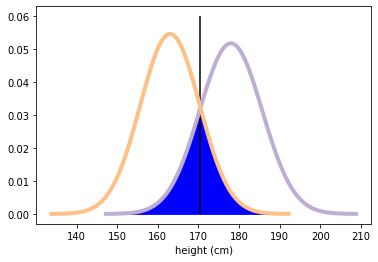

In [23]:
#analysing what these thresholds would look like when laid over the PDF 
#of both samples' distributions

#Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

The overlap or shaded region above is the total AUC or Area Under the Curve. This is used to identify the samples that end up on the wrong side of the threshold

In [26]:
#we can calculate the amount of overlap as 

overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap

0.306

Cohen's d

One of the most common ways to measure effect size. It represents the magnitude of differences betweeb two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable

The basic formula for calculating Cohen's d is :

> **$d$ = effect size (difference of means) / pooled standard deviation**

where the denominator is the standardiser

In [27]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [28]:
Cohen_d(male_sample, female_sample)

2.0669285200851877

Rule of thumb guidelines for interpreting d

>**Small effect = 0.2**

>**Medium Effect = 0.5**

>**Large Effect = 0.8**

In [31]:
def overlap_superiority(group1, group2, n=1000):
    """Estimates overlap and superiority based on a sample.
    
    group1: scipy.stats rv object
    group2: scipy.stats rv object
    n: sample size
    """

    # Get a sample of size n from both groups
    group1_sample = group1.rvs(n)
    group2_sample = group2.rvs(n)
    
    # Identify the threshold between samples
    thresh = (group1.mean() + group2.mean()) / 2
    print(thresh)
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1_sample < thresh)
    below = sum(group2_sample > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1_sample, group2_sample)) / n

    return overlap, superiority

In [32]:
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)

In [33]:
overlap_superiority(male_height, female_height, n=1000)

170.5


(0.336, 0.94)

2.5
overlap 1.992


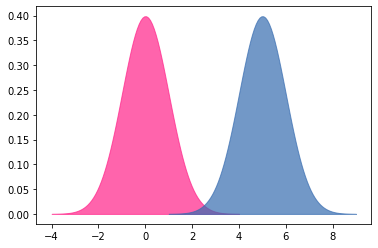

In [34]:
plot_pdfs(5)

The probability of superiority in this case is the probability that a randomly chosen man is taller than a randomly chosen woman. Overlap here is the misclassification rate or the fraction of people who would get misclassified if we try to use height to guess sex

Benefits of using Cohen's d

1. we can compare d across different studies as the ratio of mean and SD is dimensionless
2. we can calibrate whether an effect size is big, surprising or important using the d value
3. given d, and assuming distributions are normal, we can compute overlap, superiority and related statistics

T-tests 

In frequentist hypothesis testing, we contruct a test statistic from the measured data and use the value of that statistic to decide whether to accept or reject the null hypothesis. The t-test (or Student's t-test) can be used to compare two averages to assess if they are different from each other.

We run a t-test when we either:

1. Don't know the population SD
2. Have a small sample size (n<30)

One sample t-test

A statistical procedure that is used to determine whether a sample of observations could have been generated by a process with a specific mean. It compares the mean of sample data to a known value.

Two sample t-test

Used to determine if two population means are equal. There are two types of two sample t-tests : paired and independent. Paired tests are used to determine how different a sample is affected by a certain treatment. Independent two sample t-tests are for when we are comparing two different, unrelated samples to one another. 

The above t-tests work under certain assumptions namely that sample sizes and sample variance between the two groups are equal. When these assumptions are not met, Welch's t-test is more reliable

Here is how we calculate it: 


 $ \Large t = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{\frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{{se_1}^2+{se_2}^2}}$
where  

* $\bar{X_i}$ - mean of sample i
* ${s_i}^2$ - variance of sample i
* $N_i$ - sample size of sample i  

The modification is related to the degrees of freedom in the t-test, which tends to increase 
the test power for samples with unequal variance. When two groups have equal sample sizes and 
variances, Welch’s t-test tends to give the same result as the Student’s t-test. However, when 
sample sizes and variances are unequal, Student’s t-test is quite unreliable, whereas Welch’s tends perform better.

Calculate the degrees of freedom

Once the t-score has been calculated for the experiment using the above formula, you then must 
calculate the degrees of freedom for the t-distribution. Under the two-sample Student's t-test, 
this is simply the total number of observations in the samples size minus two, but given that 
the sample sizes may vary using the Welch's t-test, the calculation is a bit more complex:

$ \Large v \approx \frac{\left( \frac{{s_1}^2}{N_1} + \frac{{s_2}^2}{N_2}\right)^2}{\frac{{s_1}^4}{{N_1}^2v_1} + \frac{{s_2}^4}{{N_2}^2v_2}} $

Calculating p-values 

As with a student's t-test we must convert the calculated score into a p-value in order to confirm or reject the null hypothesis.

Eg. : you might be using a one-sided t-test to determine whether a new drug had a positive effect on patient outcomes. The p-value for the experiment is equivalent to the area under the t-distribution with the degrees of freedom, as calculated above, and the corresponding t-score.
    
The easiest method for determining p-values is to use the .cdf() method from scipy.stats to find the complement and subtract this from 1

In [ ]:
#relevant code snippet

import scipy.stats as stats

p = 1 - stats.t.cdf(t, df)